In [ ]:
output_classification = ['0', '1']

In [6]:
import glob
human_images = glob.glob('./dataset/1/*.png')
no_human_images = glob.glob('./dataset/0/*.png')
X = human_images + no_human_images
Y = [1] * len(human_images) + [0] * len(no_human_images)
print(X[0])

./dataset/1/348.png


In [9]:
from sklearn.model_selection import train_test_split
from skimage.transform import resize
from skimage.io import imread

target = []
flat_data = []
images = []

for img_path in X:
    img_array = imread(img_path)
    # Skimage normalizes the value of image
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)

# X_train, X_test, y_train, y_test = train_test_split(
#     resized_X, 
#     Y, 
#     test_size=0.2, 
#     shuffle=True,
#     random_state=42,
# )

In [12]:
import numpy as np
flat_data = np.array(flat_data)
images = np.array(images)
target = np.array(Y)

In [14]:
import pandas as pd

df = pd.DataFrame(flat_data)
# Create a column for output data called Target
df['Target'] = target
# Rows are all the input images (90 images, 30 of each category)
df

,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.478508,0.486360,0.475510,0.458693,0.466903,0.457378,4.518169e-01,0.469505,0.454851,4.574583e-01,...,0.348956,0.340682,0.340087,0.346730,0.339016,0.336594,0.346920,0.337535,0.338071,1
1,0.352259,0.381331,0.345805,0.402842,0.427106,0.387492,4.144551e-01,0.430948,0.388944,3.863689e-01,...,0.569755,0.405730,0.506601,0.541399,0.401580,0.474878,0.514716,0.419531,0.437522,1
2,0.545001,0.542585,0.545031,0.542301,0.542299,0.548783,5.486698e-01,0.548646,0.559755,5.437537e-01,...,0.593617,0.593022,0.620454,0.580419,0.579022,0.606473,0.537817,0.547653,0.573531,1
3,0.215677,0.332313,0.261188,0.214074,0.328778,0.256730,2.107159e-01,0.334975,0.256204,2.066246e-01,...,0.431756,0.428857,0.440709,0.425369,0.425365,0.440714,0.431373,0.428901,0.442132,1
4,0.687506,0.735975,0.737890,0.714754,0.770064,0.780230,6.823233e-01,0.738490,0.747924,6.245211e-01,...,0.640987,0.705332,0.451666,0.541975,0.611990,0.347699,0.542885,0.614518,0.340180,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,0.170197,0.180520,0.169201,0.149274,0.161430,0.162719,1.655885e-01,0.181913,0.187125,1.743728e-01,...,0.401856,0.409995,0.411028,0.396846,0.403862,0.409637,0.386199,0.401304,0.406042,0
917,0.789030,0.868155,0.899915,0.201893,0.272883,0.340574,2.143703e-01,0.236523,0.254948,3.342191e-01,...,0.994166,0.994166,0.996004,0.999992,0.999992,0.999994,1.000000,1.000000,1.000000,0
918,0.179838,0.288799,0.883961,0.197755,0.312203,0.887980,2.042458e-01,0.322436,0.889774,2.068371e-01,...,0.461162,0.421360,0.899517,0.450657,0.416330,0.898679,0.442664,0.408614,0.897391,0
919,0.790197,0.863000,0.454507,0.775922,0.846106,0.470222,7.873711e-01,0.856160,0.492666,7.662698e-01,...,0.007547,0.001463,0.000008,0.012993,0.010941,0.002744,0.033512,0.027379,0.007665,0


AxesImage(size=(150, 150))


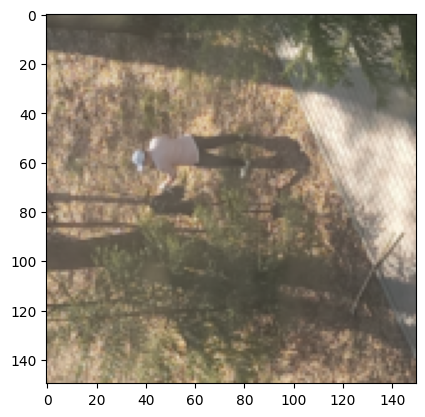

In [16]:
import matplotlib.pyplot as plt

print(plt.imshow(images[20]))

In [17]:
x = df.iloc[:,:-1].values
y = target

x_train,x_test,y_train,y_test = train_test_split(x,y,shuffle=True,test_size = 0.3,random_state=109,stratify=y)
print("Dimensions of input training data:",x_train.shape)
print("Dimensions of input testing data:",x_test.shape)
print("Dimensions of output training data:",y_train.shape)
print("Dimensions of output testing data:",y_test.shape)

Dimensions of input training data: (644, 67500)
Dimensions of input testing data: (277, 67500)
Dimensions of output training data: (644,)
Dimensions of output testing data: (277,)


In [18]:
# Applying Support Vector Machine classifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]
                    
# Apply GridSearchCV to find best parameters for given dataset
# verbose is used to describe the steps taken to find best parameters
cv = GridSearchCV(SVC(), tuned_parameters, refit = True,verbose= 3) 
cv.fit(x_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.612 total time=  12.4s
[CV 2/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.605 total time=  11.4s
[CV 3/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.597 total time=  11.5s
[CV 4/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.636 total time=  11.5s
[CV 5/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.609 total time=  11.2s
[CV 1/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.612 total time=  10.6s
[CV 2/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.612 total time=  10.7s
[CV 3/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.628 total time=  10.5s
[CV 4/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.620 total time=  10.6s
[CV 5/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.633 total time=  10.5s
[CV 1/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.605 total time=  11.6s
[CV 2/5] END .....C=10, gamma=0.001, kernel=rbf;,

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             verbose=3)

In [2]:
import numpy as np

def fd_hu_moments(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    feature = cv2.HuMoments(cv2.moments(image)).flatten()
    return feature
def fd_haralick(image):    # convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # compute the haralick texture feature vector
    haralick = mahotas.features.haralick(gray).mean(axis=0)
    return haralick
 
def fd_histogram(image, mask=None):
    # convert the image to HSV color-space
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # compute the color histogram
    hist  = cv2.calcHist([image], [0, 1, 2], None, [bins, bins, bins], [0, 256, 0, 256, 0, 256])
    # normalize the histogram
    cv2.normalize(hist, hist)
    hist.flatten()

global_feature = np.hstack([fd_histogram(image), fd_haralick(image), fd_hu_moments(image)])
scaler = MinMaxScaler(feature_range=(0, 1))
#Normalize The feature vectors...
rescaled_features = scaler.fit_transform(global_features)

from sklearn.svm import SVC
clf = models.append(('SVM', SVC(random_state=9)))
prediction= clf.fit(global_feature.reshape(1,-1))[0]

NameError: name 'image' is not defined